<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Matias Alvarez

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [1]:
def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función

    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
      
    # prestar atención que las tuplas dentro de los diccionarios también pueden direccionarse mediante "ii"
    signal = a0 * np.sin( 2*np.pi*f0*tt + p0 )
    # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
    #x = np.hstack([x, signal.reshape(N,1)] )
            
    
    # fin de la función
    
    return tt, signal



Se podria invocar la señal que genera ruido de la siguiente manera:

In [2]:
def generador_ruido (fs, N, media, varianza):
    """ 
    
    brief:  Generador de ruido, con argumentos
    
    fs:        frecuencia de muestreo de la señal [Hz]
    N:         cantidad de muestras de la señal a generar
    media:     media de la señal 
    varianza:  varianza de la señal

    
    como resultado la señal devuelve:
    
    signal: señal de ruido evaluada en cada instante 
    tt:     base de tiempo de la señal
    """ 

    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    signal = np.sqrt(varianza) * np.random.randn(N,1) + media

    # fin de la función
    
    return tt, signal

Se podria invocar la señal que genera una señal cuadrada de la siguiente manera:

In [3]:
def generador_cuadrada (A, d, N, fs):
    """ 
    
    brief:  Generador de señal cuadrada entre 0 y N-1(importante)(NO periodica), con argumentos
    
    fs: frecuencia de muestreo de la señal [Hz]
    N:  cantidad de muestras de la señal a generar
    A:  Amplitud de la señal [V]
    d:  duty de la señal

    
    como resultado la señal devuelve:
    
    signal: señal cuadrada evaluada en cada instante 
    tt:     base de tiempo de la señal
    """
    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    #t = np.arange(0, N-1, ts)
    signal = A * sgn.square(2 * np.pi *tt, d)

    # fin de la función
    
    return tt, signal

a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import scipy.fftpack as sc 
from scipy import signal as sgn

Ejemplo funcionamiento funcion generadora de senoidal:

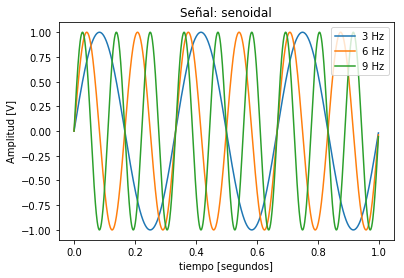

In [5]:
N  = 1000 # muestras
fs = 1000 # Hz

a0 = 1 # Volts
p0 = 0 # radianes

#Arreglo de frecuencia
frec = [3, 6 , 9]

x = np.array([], dtype=np.float).reshape(N,0)

#Genero las 3 señales
for i in range(0,3):
    t, signal = generador_senoidal (fs, frec[i], N, a0, p0)
    # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
    x = np.hstack([x, signal.reshape(N,1)] )

#Grafico
plt.figure(1)

line_hdls = plt.plot(t, x)

plt.title('Señal: senoidal' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, [ str(a_freq) + ' Hz' for a_freq in frec ], loc='upper right'  )

plt.show()

Ejemplo funcionamiento funcion generadora de ruido:

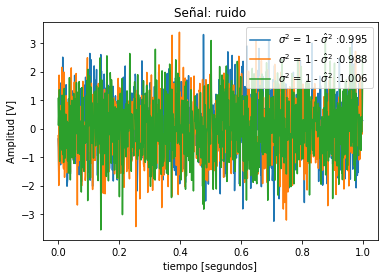

In [6]:
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras


x = np.array([], dtype=np.float).reshape(N,0)

sig_props = { 'varianza': (1, 1, 1) } # Uso de tuplas para las varianzas 
             
sig_props['descripcion'] = [ '$\sigma^2$ = ' + str(a_var) for a_var in sig_props['varianza'] ]

#Genero las señales
for var in sig_props['varianza']:
    t, signal = generador_ruido(fs, N, 0, var)
    # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
    x = np.hstack([x, signal] )

sig_props['descripcion'] = [ sig_props['descripcion'][ii] + ' - $\hat{{\sigma}}^2$ :{0:.3f}'.format( np.var(x[:,ii]))  for ii in range(0,len(sig_props['descripcion'])) ]

#Grafico
plt.figure(1)

line_hdls = plt.plot(t, x)

plt.title('Señal: ruido' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, sig_props['descripcion'], loc='upper right')

plt.show()

Ejemplo funcionamiento funcion señal cuadrada:


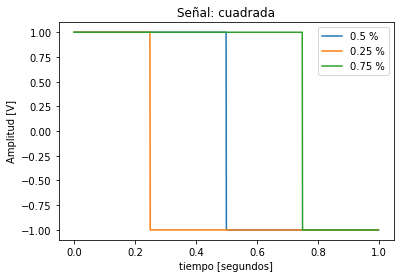

In [7]:
N  = 1000 # muestras
fs = 1000 # Hz

A = 1  #Volts
#Arreglo de dutys
d = [0.5, 0.25 , 0.75]

x = np.array([], dtype=np.float).reshape(N,0)

#Genero las 3 señales
for i in range(0,3):
    t, signal = generador_cuadrada (A, d[i], N, fs)
    # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
    x = np.hstack([x, signal.reshape(N,1)] )

#Grafico
plt.figure(1)

line_hdls = plt.plot(t, x)

plt.title('Señal: cuadrada' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, [ str(a_duty) + ' %' for a_duty in d ], loc='upper right'  )

plt.show()

In [8]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


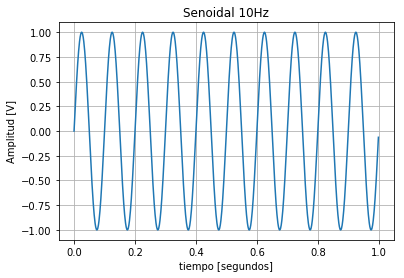

In [9]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

#Genero señal
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

#Grafico
plt.figure(1)
plt.plot(tt, signal)

plt.title('Senoidal ' + str(f0) + 'Hz')

plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, dado que en el grafico visualizamos 10 periodos, es posible afirmar que se trata de una sinusoide de frecuencia 10Hz.
</div>

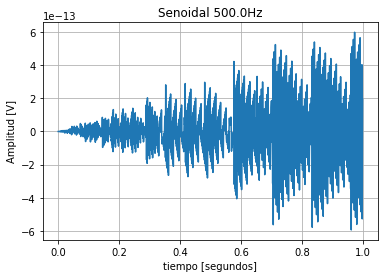

In [10]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

#Genero la señal
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

#Grafico
plt.figure(1)

plt.plot(tt, signal)
 
plt.title('Senoidal ' + str(f0) + 'Hz')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

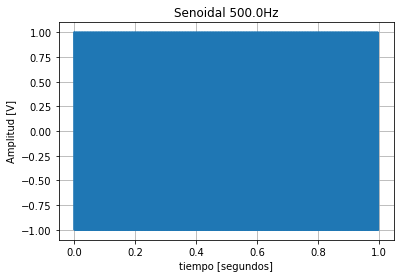

In [11]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

#Genero al señal
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

#Grafico
plt.figure(1)

plt.plot(tt, signal)

plt.title('Senoidal ' + str(f0) + 'Hz')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, no podria.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 

En el caso a.2 estamos muestreando a la frecuencia de Nyquist(sub-muestreando), y se obtienen 2 muestras por ciclo de la sinusoide que justamente coinciden con los ceros de la señal. La representacion de dichos ceros se va corriendo por la discretizacion del eje temporal y por la aproximacion que se realiza del numero "pi".

En el caso a.3, nuevamente estamos muestreando a la frecuencia de Nyquist(sub-muestreando), pero en este caso la señal esta desfazada pi/2 respecto a la anterior, y las muestras tomadas coinciden con los maximos y minimos de la señal en cada ciclo. El grafico interpola estos puntos y se visuliza como lineas verticales.
</div>

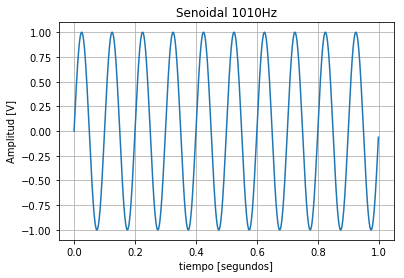

In [12]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

#Genero la señal
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

#Grafico
plt.figure(1)

plt.plot(tt, signal)

plt.title('Senoidal ' + str(f0) + 'Hz')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.grid(which='both', axis='both')

plt.show()

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, no es posible.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La solucion a implementar podria ser aumentar la frecuencia de muestreo.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

In [4]:
def dft(signal):
    """ 
    brief:  Calculador de la Transformada discreta de fourier
    
    signal:  vector de amplitud de una señal temporal muestreada
    
    como resultado la señal devuelve:
    
    spectrum:  vector de amplitud de la dft de la señal de entrada
    """ 
    
    #Obtengo numero de muestras de la señal
    N = len(signal)
    
    #Creo un arreglo vacio de largo N:muestras de la señal
    n = np.arange(N)
    #Creo un arreglo transpuesto del anterior
    k = n.reshape([N, 1])
    #Obtengo un vector con el valor de las exponenciales para cada n
    exp = np.exp(-((2j * np.pi * n * k) / N))
    #Hago la multiplicacion punto a punto de los vectores
    spectrum = np.dot(signal, exp)

    return spectrum

Ejemplo con senoidal:

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


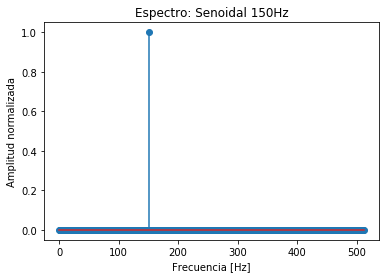

In [5]:
a0 = 1     # Volts
p0 = 0     # radianes
f0 = 150   # Hz

#Genero la señal
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

#Obtengo el espectro con la dft implementada
spectrum = (2/N)*np.abs(dft(signal))

#Me quedo con la primer mitad del espectro
half = spectrum[:N//2] 

f = np.linspace(0, fs/2, N/2).flatten()

#Grafico
plt.figure(1)

plt.stem(f, half)

plt.title('Espectro: Senoidal ' + str(f0) + 'Hz' )
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud normalizada')

plt.show()

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

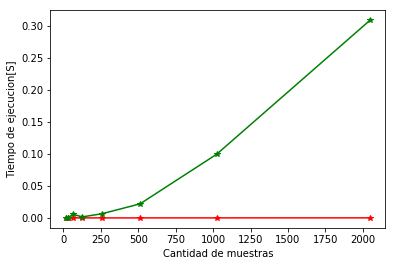

In [15]:
N  = [16, 32, 64, 128, 256, 512, 1024, 2048] # muestras
fs = [16, 32, 64, 128, 256, 512, 1024, 2048] # Hz

a0 = 1     # Volts
p0 = 0     # radianes
f0 = 5     # Hz

L = len(N)

#Vectores de tiempo de cada dft
fftTime = [0] * L

dftTime = [0] * L

#Por cada prueba
for i in range(L):
    #Obtenemos la señal
    tt, signal = generador_senoidal(fs[i], f0, N[i], a0, p0)

    #FFT
    timeStart = time.perf_counter()

    spectrumFFT = (2/N[i])*np.abs(sc.fft(signal))

    halfFFT = spectrumFFT[:N[i]//2] 

    fftTime[i] = time.perf_counter() - timeStart
    
    #DFT
    timeStart = time.perf_counter()

    spectrumDFT = (2/N[i])*np.abs(dft(signal))

    halfDFT = spectrumDFT[:N[i]//2]

    dftTime[i] = time.perf_counter() - timeStart

#Grafico
plt.plot(N, fftTime, '-*r', label='FFT')
plt.plot(N, dftTime, '-*g', label='DFT')

plt.title('' )
plt.xlabel('Cantidad de muestras')
plt.ylabel('Tiempo de ejecucion[S]')

plt.show()

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [16]:
the_start = time.process_time() 
print("hello")
the_end = time.process_time() 
print(the_start - the_end)

hello
-0.00027550500000117495


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [17]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

resultados = [ ['DFT','FFT'], 
                   [str(dftTime[0]),str(fftTime[0])], # <-- acá debería haber numeritos :)
                   [str(dftTime[1]),str(fftTime[1])], # <-- acá debería haber numeritos :)
                   [str(dftTime[2]),str(fftTime[2])], # <-- acá debería haber numeritos :)
                   [str(dftTime[3]),str(fftTime[3])], # <-- acá debería haber numeritos :)
                   [str(dftTime[4]),str(fftTime[4])], # <-- acá debería haber numeritos :)
                   [str(dftTime[5]),str(fftTime[5])], # <-- acá debería haber numeritos :)
                   [str(dftTime[6]),str(fftTime[6])], # <-- acá debería haber numeritos :)
                   [str(dftTime[7]),str(fftTime[7])] # <-- acá debería haber numeritos :)
                 ]

df = DataFrame(resultados,columns=['tiempo transcurrido (s)',' '],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

C:\Users\alvma\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


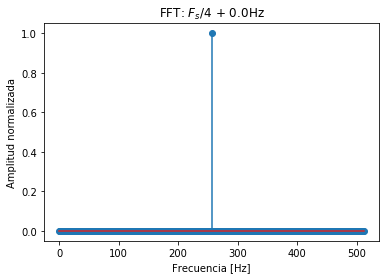

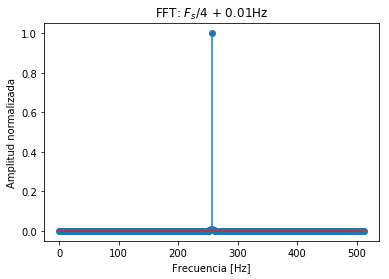

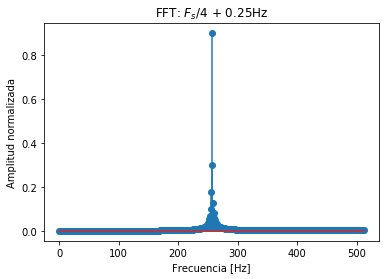

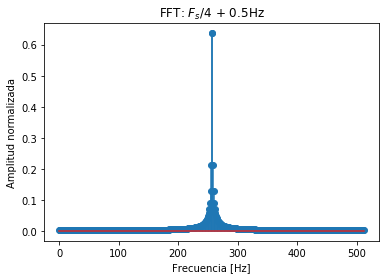

In [6]:
N  = 1024     # muestras
fs = 1024     # Hz

#Arreglo de frecuencias de desintonia
fd = np.array([[0.00], [0.01], [0.25], [0.5]])

a0 = 1      # Volts
p0 = 0      # radianes
f0 = fs/4 + fd      # Hz

#Largo del vector de frecuencias de desintonia
L = len(fd)

#Obtenemos señal
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

#Obtenemos espectro
spectrum = (2/N)*np.abs(sc.fft(signal))     #arreglo bidimensional

#Nos quedamos con la primer mitad del espectro
halfSpectrum = spectrum[:,:N//2]            #arreglo bidimensional

#Arreglo de frecuencias del espectro
f = np.linspace(0, fs/2, N/2).flatten()

#Graficamos para cada frecuencia de desintonia
for i in range(L):
    plt.figure(i+1)

    plt.stem(f, halfSpectrum[i])

    plt.title('FFT: $F_s/4$ + ' + str(fd[i][0]) + 'Hz')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud normalizada')

    plt.show()

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [19]:
#Arreglo de ceros para el calculo de la sumatoria de los cuadrados del espectro en cada fi
total = [0, 0, 0, 0]

for i in range(L): 
    for j in range(N//2):
        if j != N//4:           #fs/4
            total[i] += (halfSpectrum[i][j] * halfSpectrum[i][j])   #Al cuadrado


resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
               ['',                        '',                           '$F:f \neq f_0$'], 
              [str(halfSpectrum[0][N//4]), str(halfSpectrum[0][N//4+1]), str(total[0])],
              [str(halfSpectrum[1][N//4]), str(halfSpectrum[1][N//4+1]), str(total[1])],
              [str(halfSpectrum[2][N//4]), str(halfSpectrum[2][N//4+1]), str(total[2])], 
              [str(halfSpectrum[3][N//4]), str(halfSpectrum[3][N//4+1]), str(total[3])]  
             ]
df = DataFrame(resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


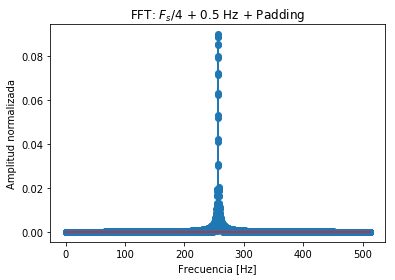

In [20]:
N  = 1024     # muestras
fs = 1024     # Hz

a0 = 1      # Volts
p0 = 0      # radianes
f0 = fs/4 + 0.5      # Hz

#Genero señal
tt, signal = generador_senoidal(fs, f0, N, a0, p0)

#Ventaneo la señal
padSignal = np.pad(signal, (N//10, 10*N), 'constant')

#Nuevo numero de muestras
NN = N//10 + N + 10*N

#Obtengo espectro de la señal ventaneada
spectrum = (2/NN)*np.abs(sc.fft(padSignal))    

#Me quedo con la primer mitad del espectro
halfSpectrum = spectrum[:NN//2]          

#Arreglo de frecuencias del espectro
f = np.linspace(0, fs/2, NN/2).flatten()

#Grafico
plt.stem(f, halfSpectrum)

plt.title('FFT: $F_s/4$ + 0.5 Hz + Padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud normalizada')

plt.show()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como la resolucion espectral es igual a Fs/N, siendo N el numero de muestras, y al aumentar N de la siguiente forma: 10*N + N + N/10, la resolucion espectral resultante es menor.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


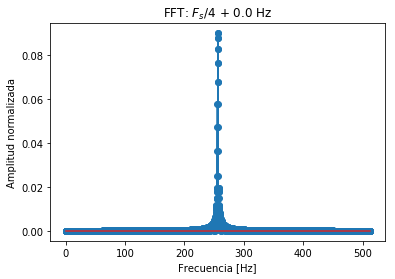

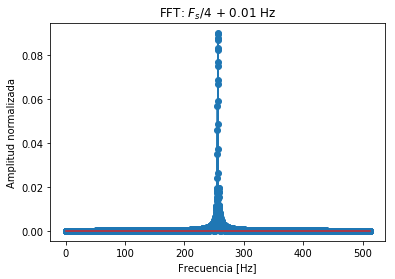

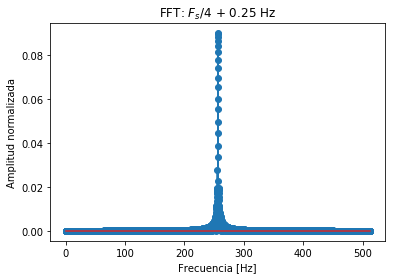

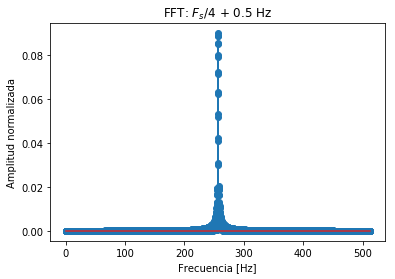

In [21]:
N  = 1024     # muestras
fs = 1024     # Hz

#Arreglo de frecuencias de desintonia
fd = np.array([[0.00], [0.01], [0.25], [0.5]])

a0 = 1      # Volts
p0 = 0      # radianes
f0 = fs/4 + fd      # Hz

#Largo del arreglo de frecuencias de desintonia
L = len(fd)

#Numero de muestras despues del ventaneo
NN = N//10 + N + 10*N

#Arreglo de frecuencias del espectro
f = np.linspace(0, fs/2, NN/2).flatten()

#Para cada frecuencia de desintonia
for i in range(L):
    #Generamos señal
    tt, signal = generador_senoidal(fs, f0[i], N, a0, p0)
    #Ventaneamos la señal
    padSignal = np.pad(signal, (N//10, 10*N), 'constant')
    #Calculamos el espectro
    spectrum = (2/NN)*np.abs(sc.fft(padSignal))     
    #Nos quedamos con la primer mitad del espectro
    halfSpectrum = spectrum[:NN//2]            
    
    #Grafico
    plt.figure(i+1)

    plt.stem(f, halfSpectrum)

    plt.title('FFT: $F_s/4$ + ' + str(fd[i][0]) + ' Hz')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud normalizada')

    plt.show()

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Mientras que la firma del espectro no se ve alterada, si aumenta su resolucion.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [8]:
def estimar_fundamental(spectrum, fs, N):
    """ 
    brief:  Estimador de la fundamental de una señal dado su espectro
    
    spectrum:  espectro de la señal a estimar su fundamental
    
    fs: Señal a la que fue muestreada la señal
    
    N: Cantidad de muestras de la señal
    
    como resultado la señal devuelve:
    
    f:  Frecuencia fundamental estimada
    """ 
    #Frecuencia inicializada en 0
    f = 0 
    #Arreglo vacio
    n = []
    #Largo del espectro
    L =  len(spectrum)
    #Maximo del espectro
    m = max(spectrum)
    #Calculamos el numero de muestra/s donde se encuentra el/los maximo/s
    for i in range(L):
        if(spectrum[i] == m):
            n.append(i)
            
    #Sumamos los maximos(si hay mas de uno)
    for i in range(len(n)):
        f += n[i]

    #Promediamos los maximos y estimamos
    f = (f / len(n)) * fs/N

    return f

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


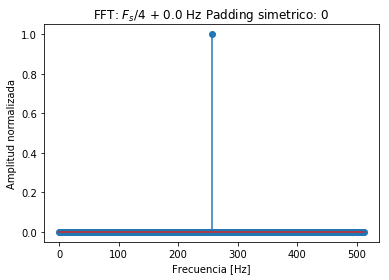

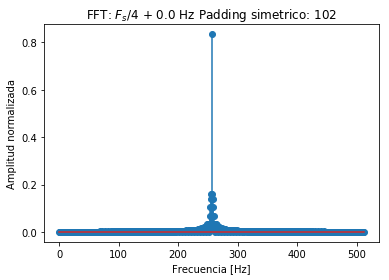

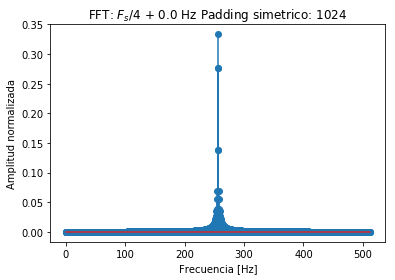

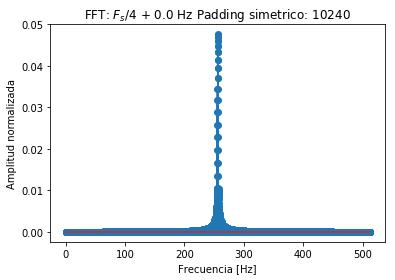

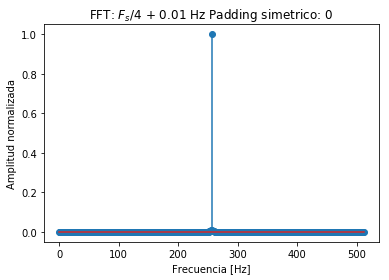

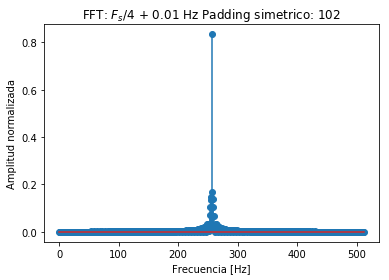

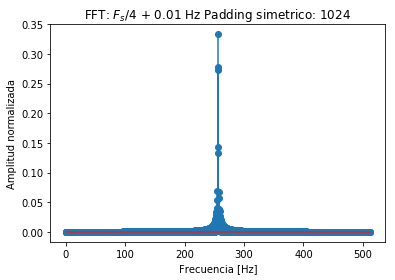

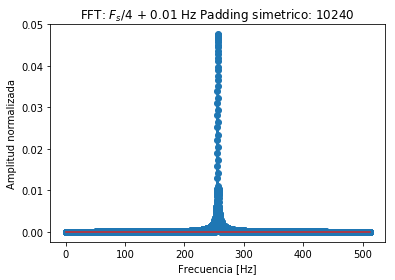

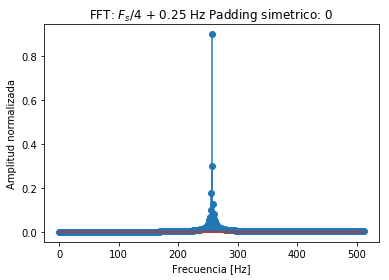

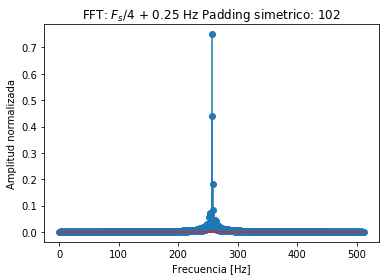

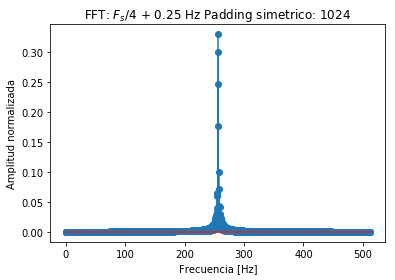

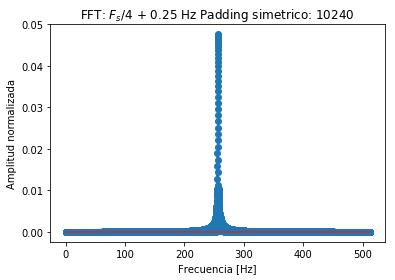

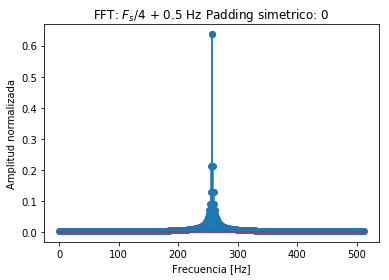

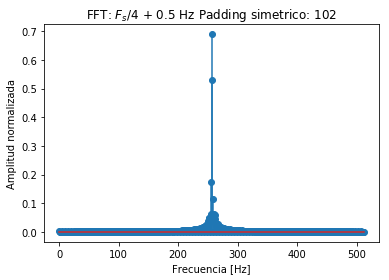

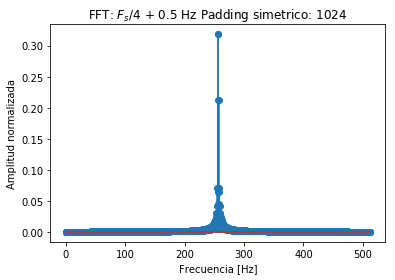

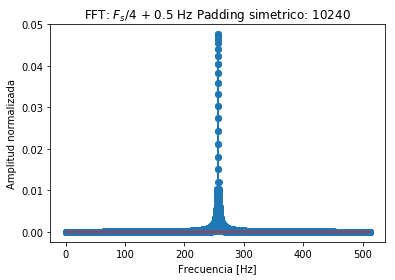

In [11]:
from pandas import DataFrame
from IPython.display import HTML

N  = 1024     # muestras
fs = 1024     # Hz

a0 = 1      # Volts
p0 = 0      # radianes

#Arreglo de frecuencias de desintonia
fd = np.array([[0.00], [0.01], [0.25], [0.5]])

#Arreglo de frecuencias fundamental
f0 = fs/4 + fd      # Hz

#Vector de "paddings"
zeros = [0, N//10, N, 10*N]

#Largo del vector de "paddings"
Lz = len(zeros)

#Largo del vector de frecuencias de desintonia
Lfd = len(fd)

#Matriz de porcentaje de error de estimacion de frecuencia fundamental
percentage = [[0 for x in range(Lfd)] for y in range(Lz)]

#Por cada frecuencia de desintonia
for i in range(Lfd): 
    #Por cada ejemplo de padding
    for j in range(Lz):
        #Calculamos señal
        tt, signal = generador_senoidal(fs, f0[i], N, a0, p0)
        #Realizamos ventaneo
        padSignal = np.pad(signal, (zeros[j], zeros[j]), 'constant')
        #Numero de muestras
        NN = zeros[j]*2 + N
        #Arreglo de frecuencias del espectro
        ff = np.linspace(0, fs/2, NN/2).flatten()
        #Calculamos espectro
        spectrum = (2/NN)*np.abs(sc.fft(padSignal))    
        #Nos quedamos con la primer mitad del espectro
        halfSpectrum = spectrum[:NN//2]  
        #Obtenemos el estimador de la fundamental
        f = estimar_fundamental(halfSpectrum, fs, NN)      
        #Calculamos el porcentaje de error
        percentage[i][j] = abs(f0[i][0]-f)*100/(f0[i][0])
        #Grafico
        plt.figure(i+1)

        plt.stem(ff, halfSpectrum)

        plt.title('FFT: $F_s/4$ + ' + str(fd[i][0]) + ' Hz ' + 'Padding simetrico: ' + str(zeros[j]))
        plt.xlabel('Frecuencia [Hz]')
        plt.ylabel('Amplitud normalizada')

        plt.show()

resultados = [ ['+0.00','+0.01','+0.25','+0.50'], 
                   [str(percentage[0][0]),str(percentage[1][0]),str(percentage[2][0]),str(percentage[3][0])], # <-- acá debería haber numeritos :)
                   [str(percentage[0][1]),str(percentage[1][1]),str(percentage[2][1]),str(percentage[3][1])], # <-- acá debería haber numeritos :)
                   [str(percentage[0][2]),str(percentage[1][2]),str(percentage[2][2]),str(percentage[3][2])], # <-- acá debería haber numeritos :)
                   [str(percentage[0][3]),str(percentage[1][3]),str(percentage[2][3]),str(percentage[3][3])], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(resultados,columns=['$e_\%$',' ',' ',' '],
               index=['Zero Padding', 
                      '0', 
                      'N/10', 
                      'N', 
                      '10N',
                     ])
HTML(df.to_html())
